In [ ]:
#!pip install gdown
# packages needed
#!pip install nltk
!pip install stanfordnlp
!pip install --upgrade bleu
#!pip install pycountry


In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
import numpy as np
import string
import re

## ***Preprocessing***



In [ ]:
data = pd.read_csv('/kaggle/input/amazon-reviews/train.csv')

# First Phase : EDA

In [ ]:
! python --version

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.head()

## as we see the column names are consiedred as rows so we will convert them to rows and handling the columns name

In [ ]:
data=pd.DataFrame(np.vstack([data.columns, data]))
data.columns = ['Polarity', 'Title', 'Review']
print(data.shape)
data.head()

## after the previous step  the value of index 0 at 'Polarity' column will be be considered as object so we should handle it

In [ ]:
data['Polarity'] = data['Polarity'].astype(int)

In [ ]:
data.info()

In [ ]:
data = data[['Polarity', 'Review']].reset_index(drop=True)
data.head(15)

In [ ]:
# in this case the same review with same class is repeated
data.duplicated().sum()

# we will drop all duplicates

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

In [ ]:
data.shape

## in the below case the same review may have <span style="background:yellow" >different class</span> and this will distract the model *so we will remove the redundant row and the original from the data then we will annotate it* and then we will merge it to the original dataset

In [ ]:
data["Review"].duplicated().sum()

In [ ]:
data["Review"].drop_duplicates(keep=False,inplace=True)
data.shape

In [ ]:
duplicated_data=data[data["Review"].duplicated(keep=False)]
duplicated_data

# the duplicated data with human annotation

In [ ]:
unique_data=pd.read_csv('/kaggle/input/unique/data.csv')
unique_data.shape

In [ ]:
unique_data.head()

In [ ]:
data=pd.DataFrame(np.vstack([unique_data, data]))
data.columns = ['Polarity', 'Review']
data.head()

# the column 'Polarity' will be as object 

In [ ]:
data.info()

In [ ]:
data['Polarity'] = data['Polarity'].astype(int)

## check the target class whether <span style="background: yellow">Balanced or Not</span>

In [ ]:
value_counts=data.Polarity.value_counts()
value_counts

In [ ]:
value_counts.plot(kind="bar",x=value_counts.keys,colormap='viridis')

## check null values

In [ ]:
# Count the null values
data.isnull().sum()

No null values

In [ ]:
data.info()

# Second Pahse: Cleaning Phase

In [ ]:
## this function is for loweringcase all the words
def lower(text):
    ## we want to split the words of the sentence by split() to work with each word individually
    words = text.split()
    ## we created a new list to save all the lowercase words and we converted it by lower() method
    lower = [word.lower() for word in words]
    ## after finishing we join them back by join() method
    return ' '.join(lower)
## applying the function on the feature Review
data['Review']= data['Review'].apply(lambda x:lower(x))
data.head()

In [ ]:
## this function is for removing hyperlinks
def hyperlinks(text):
    ## this pattern follows any url
    pattern = r'http\S+|www\S+'
    ## re.sub() is used for substituting all the links with spaces
    removed = re.sub(pattern, '', text)
    return removed
## applying the function on the feature Review
data['Review']= data['Review'].apply(lambda x:hyperlinks(x))

In [ ]:
## defining a function for removing tabs between words
def remove_large_spaces(text):
    ## this pattern is for tabs
    pattern = r'\s+'
    # Remove tabs using regex substitution with spaces
    removed_spaces = re.sub(pattern, ' ', text)
    ## the strip method is used to remove any leading spaces after substitution
    return removed_spaces.strip()
data['Review']= data['Review'].apply(lambda x:remove_large_spaces(x))

In [ ]:
# show th stopwords
stopword = nltk.corpus.stopwords.words('english')
print(stopword)

In [ ]:
# defining a function to remove stopwords
def remove_stopwords(text):
    # checking if the word in the sentences contain stop words or not and save it
    text=' '.join([word for word in text.split() if word not in stopword])
    return text
data['Review'] = data['Review'].apply(lambda x: remove_stopwords(x))

In [ ]:
#we'll import string library as it already contains pre-defined punctuations
import string
string.punctuation
#defining the function to remove punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the punctuation-free text
data['Review']= data['Review'].apply(lambda x:remove_punctuation(x))

## chat word to be determined by doctor
### note we need to converting the below data to lower case

In [ ]:
# url = "https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/NLP/Text%20Pre-Processing%20VII%20(Special%20Cases)/chat_expressions.csv"

# chat_expressions = pd.read_csv(url)
# chat_expressions

In [ ]:
# chat_expressions_dict = dict(zip(chat_expressions.Chat_Words, chat_expressions.Chat_Words_Extended))

In [ ]:
# def chatwords_to_normwords(text):

#     return re.sub(r'\S+', lambda m: chat_expressions_dict.get(m.group().upper(), m.group()) , text)

# data["Review"]=data["Review"].apply(lambda x : chatwords_to_normwords(x))

In [ ]:
## definig a function to remove non word characters
def remove_non_word_characters(sentence):
    # Regex pattern to match non-word characters
    pattern = r'\W+'
    # Remove non-word characters using regex substitution with spaces
    cleaned_sentence = re.sub(pattern, ' ', sentence)
    return cleaned_sentence
data['Review'] = data['Review'].apply(remove_non_word_characters)

In [ ]:
## this function is for removing the numbers in text data
def remove_numbers(text):
    ## this pattern in special for numbers
    pattern = r'\d+'
    # Remove numbers using regex substitution with spaces
    removed_numbers = re.sub(pattern, '', text)
    return removed_numbers
data['Review']= data['Review'].apply(lambda x:remove_numbers(x))

In [ ]:
## this function as for removing any html tag
def remove_html(text):
    html_re = re.compile(r'<.*?>')
    # create regex for html tag
    text = re.sub(html_re, '', text)
    return text
data['Review']= data['Review'].apply(lambda x:remove_html(x))

In [ ]:
## this function is for removing date and time from the texts
def remove_date_time(text):
    # this patterns match date and time formats
    # Matches MM/DD/YYYY or MM/DD/YY
    date_pattern = r"\d{1,2}/\d{1,2}/\d{2,4}"
     # Matches HH:MM or HH:MMAM/HH:MMPM
    time_pattern = r"\d{1,2}:\d{2}([AP]M)?"
    # Remove date and time patterns from the text
    text_without_date = re.sub(date_pattern, "", text)
    text_without_date_time = re.sub(time_pattern, "", text_without_date)
    return text_without_date_time
data['Review']= data['Review'].apply(lambda x:remove_date_time(x))

In [ ]:
## this function is for removing mentions and hashtags from the texts
def remove_mentions_hashtags(text):
    # Remove mentions
    text_without_mentions = re.sub(r"@\w+", "", text)
    # Remove hashtags
    text_without_mentions_hashtags = re.sub(r"#\w+", "", text_without_mentions)
    return text_without_mentions_hashtags
data['Review']= data['Review'].apply(lambda x:remove_mentions_hashtags(x))

# to be determined by doctor as we have 2 codes for TrueCasing but both take time the below cell take 10 mins and didn't run (maybe will take more)
## the second take 1 hr

In [ ]:
# # import the Natural Language Toolkit (NLTK) library
# import nltk
# # import the sent_tokenize function from the NLTK library
# from nltk.tokenize import sent_tokenize
# # import the regular expression (re) module
# import re
# # import the StanfordNLP library
# import stanfordnlp
# # import the list_bleu function from the BLEU library
# from bleu import list_bleu

# # init packages
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# # This downloads the English models for the neural pipeline
# stanfordnlp.download('en')
# # This sets up a default neural pipeline in English
# stf_nlp = stanfordnlp.Pipeline(processors='tokenize,mwt,pos')

In [ ]:
# # function for restoring capitalization
# def true_casing(text):
#     # split the text into words
#     words = word_tokenize(text, language='english')
#     # capitalize the words
#     words_capitalized = [s.capitalize() for s in words]
#     # join the capitalized sentences
#     text_truecase = re.sub(" (?=[\.,'!?:;])", "", ' '.join(words_capitalized))
#     # capitalize words according to part-of-speech tagging (POS)
#     doc = stf_nlp(text_truecase)
#     text_truecase =  ' '.join([w.text.capitalize() if w.upos in ["PROPN","NNS"] \
#                                                    else w.text for sent in doc.sentences \
#                                for w in sent.words])
#     text_truecase = re.sub(r'\s([?.!"](?:\s|$))', r'\1', text_truecase)
#     return text_truecase


# data['Review']= data['Review'].apply(lambda x:truecasing(x))

# the second way

In [ ]:
# import pandas as pd
# import re
# import nltk
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk import pos_tag
# import pycountry
# def get_country_names():
#     return [country.name for country in pycountry.countries]

# def truecasing(text):
#     if pd.isna(text) or not isinstance(text, str):
#         return text
#     else:
#         sentences = sent_tokenize(text)
#         result_sentences = []

#         country_names = get_country_names()

#         for sentence in sentences:
#             words = word_tokenize(sentence, language='english')
#             tagged_words = pos_tag(words)

#             words_truecase = []
#             for word, pos in tagged_words:
#                 if pos in ['NN', 'NNS', 'NNP', 'NNPS'] or word in country_names:
#                     words_truecase.append(word.capitalize())
#                 else:
#                     words_truecase.append(word.lower())

#             sentence_truecase = ' '.join(words_truecase)
#             result_sentences.append(sentence_truecase)

#         result_text = ' '.join(result_sentences)
#         result_text = re.sub(r'\s+([?.!"](?:\s|$))', r'\1', result_text)
#         return result_text

# # Apply the function to the 'Review' column
# data['Review'] = data['Review'].apply(lambda x: truecasing(x))
# data.head()


# to be determined by doctor

In [ ]:
# from textblob import TextBlob

# def spell_check(sentence):
#     # Check if the input is a list of strings
#     if isinstance(sentence, list):
#         # Concatenate the list into a single string
#         sentence = ' '.join(sentence)

#     # Return the corrected string
#     return str(TextBlob(sentence).correct())

# # Apply the spell_check function to the 'Review' column in the 'data' DataFrame
# data['Review'] = data['Review'].apply(lambda x: spell_check(x))
# data.head()

In [ ]:
#import nltk
#nltk.download('punkt')

In [ ]:
data['Review'] = data['Review'].apply(lambda x: nltk.word_tokenize(x))

data.head()

In [ ]:
data.head()

## save the cleaned data

In [ ]:
# data.to_csv('cleaned_data_final.zip', index=False, compression=dict(method='zip', archive_name='cleaned_data_final.csv'))

## end of final cleaning

In [ ]:
# to read the cleaned data 
import pandas as pd
data=pd.read_csv('/kaggle/input/final-cleaned-data/cleaned_data_final.csv')
data.head()

## Note : the type of Review is object but the value itself is <span  style="background:yellow">STR</span> and we need to convert it to  LIST  that contains values each of it is STR

In [ ]:
data.Review[0]


In [ ]:
type(data.Review[0])

In [ ]:
import ast
data["Review"]=data["Review"].apply(lambda x : ast.literal_eval(x))
data.head()

In [ ]:
type(data.Review[0])

In [ ]:
data.head()

# Third Phase : analysis Phase 

### show the distribution of the Review length & postive reviews & negative reviews

In [ ]:
import ast
data["Review"]=data["Review"].apply(lambda x : ast.literal_eval(x))
type(data["Review"][0])

In [ ]:
data['length']=data["Review"].apply(lambda x : len(x))
data.head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.subplot(2,3,2)
data["length"].hist()
plt.title('Review length distribution',fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.xlim(0,150)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2,3,4)
data[data['Polarity']==1]["length"].hist()
plt.title('negative Review length distribution',fontsize=14)
plt.xlim(0,150)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2,3,6)
data[data['Polarity']==2]["length"].hist()
plt.xlim(0,150)
plt.title('positive Review length distribution',fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [ ]:
from nltk import FreqDist

In [ ]:
positive_words = []
for review in data[(data["Polarity"]==2)]["Review"]:
    positive_words.extend(review)

In [ ]:
FreqDist(positive_words).most_common(20)

In [ ]:
negative_words = []
for review in data[(data["Polarity"]==1)]["Review"]:
    negative_words.extend(review)

In [ ]:
FreqDist(negative_words).most_common(50)

### generate word cloud for all reviews & postive reviews & negative reviews

In [ ]:
from wordcloud import WordCloud , STOPWORDS
stopwords = set(STOPWORDS)
text = ' '.join([' '.join(i) for i in data.Review])
wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color ='black').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")# to hide the axis 
plt.title('word cloud for all Reviews',fontsize=14)

plt.show()

In [ ]:

# text = ' '.join([' '.join(i) for i in data[(data["Polarity"]==2)]["Review"]])
wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color ='black').generate(' '.join(positive_words))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")# to hide the axis 
plt.title('word cloud for Positive Reviews',fontsize=14)

plt.show()

In [ ]:
# text = ' '.join([' '.join(i) for i in data[(data["Polarity"]==1)]["Review"]])
wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color ='black').generate(' '.join(negative_words))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")# to hide the axis 
plt.title('word cloud for Negative Reviews',fontsize=14)

plt.show()

# Fourth Phase: Word Embedding using <span style="background: yellow;"> Spacy pre trained Model </span>
## we use the md model with 514 k key and 300 Dimension , the unseen word will be subist. with numpy.ndarray with values :  [0] *300

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential                # 'Sequential' model will be used for training.
from sklearn.model_selection import train_test_split          # 'train_test_split' for splitting the data into train and test data. 
from tensorflow.keras.preprocessing.text import Tokenizer       
from tensorflow.keras.preprocessing.sequence import pad_sequences       # 'pad_sequences' for having same dimmension for each sequence.
from tensorflow.keras.layers import Embedding,Bidirectional,GlobalMaxPool1D, LSTM, Flatten,Dense,Dropout,SpatialDropout1D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam
from keras.initializers import GlorotUniform
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install tensorflow==2.15.0

  Obtaining dependency information for tensorflow==2.15.0 from https://files.pythonhosted.org/packages/d7/3f/41f868253756f696fd00771885be60cf680352a818f08dda6e0ed8c96eea/tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes~=0.2.0 from https://files.pythonhosted.org/packages/d1/1d/d5cf76e5e40f69dbd273036e3172ae4a614577cb141673427b80cac948df/ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for wrapt<1.15,>=1.11.0 from https://files.pythonhosted.org/packages/fd/70/8a133c88a394394dd57159083b86a564247399440b63f2da0ad727593570/wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.pythonhosted.org/packages/37/12/f6e9b9dcc310263cbd3948274e286538bd6800fd0c268850788f14a0c6d0/tensorboard-2.15.2-py3-non

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: explainable-ai-sdk, tensorflow-cloud, tensorflow-decision-forests, tensorflow-serving-api, tensorflow-text, tensorflowjs, witwidget


In [3]:
# to read the cleaned data 
import pandas as pd
data=pd.read_csv('/kaggle/input/final-cleaned-data/cleaned_data_final.csv')
data.head()

,Polarity,Review
0,2,"['i', 'too', 'purchased', 'cd', 'player', 'yea..."
1,2,"['things', 'review', 'say', 'yep', 'nope', 'i'..."
2,1,"['think', 'stupid', 'write', 'words', 'rate', ..."
3,2,"['great', 'book', 'great', 'series', 'great', ..."
4,1,"['ratings', 'assign', 'movie', 'based', 'envir..."


In [4]:
subset_data=data.sample(frac=.98,ignore_index=True)
subset_data["Polarity"].value_counts()

Polarity
2    1762622
1    1760343
Name: count, dtype: int64

In [5]:
conversion = {1:0,2:1}
subset_data["Polarity"]=subset_data["Polarity"].map(conversion)

In [6]:
subset_data.Polarity.value_counts()

Polarity
1    1762622
0    1760343
Name: count, dtype: int64

In [7]:
subset_data["Review"][0]

"['find', 'camera', 'beyond', 'belief', 'works', 'old', 'af', 'minolta', 'lenses', 'i', 'film', 'camera', 'getting', 'like', 'getting', 'whole', 'bag', 'new', 'toys', 'againthe', 'results', 'incredible', 'compared', 'x', 'optical', 'zoom', 'lumix', 'mp', 'photo', 'quality', 'mp', 'astoundingkeepers', 'compared', 'digital', 'camerasgood', 'results', 'lenses', 'best', 'results', 'sony', 'lenses', 'came', 'camera', 'purchased', 'used', 'packagelooking', 'forward', 'getting', 'newer', 'generation', 'sony', 'lenses', 'longer', 'range', 'zoom']"

In [8]:
import ast
subset_data["Review"]=subset_data["Review"].apply(lambda x : eval(x))
type(subset_data["Review"][0])

list

# create a matrix for each word

In [9]:
subset_data["Review"]=subset_data["Review"].apply(lambda x : ' '.join(x))
subset_data.head()

,Polarity,Review
0,1,find camera beyond belief works old af minolta...
1,0,blah movie drags promise climax suspense surpr...
2,0,early book discussion origin use dixieland des...
3,1,suprised sub one blowout went looking replacem...
4,1,book realistic fun kept kids attention well ow...


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(subset_data["Review"], subset_data.Polarity, test_size = 0.2,shuffle=True ,random_state = 42) 
X_train.head()

1555717    janie trusted reeve beloved boyfriend cute guy...
2641742      less one star never received product took money
2520773    loved book one best life george washington for...
470970     series unfortunate events three orphans lost p...
1128208    bathe month old puppy week first really liked ...
Name: Review, dtype: object

In [11]:
tokenizer = Tokenizer(num_words = 15000)

tokenizer.fit_on_texts(subset_data["Review"])
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index)+1


In [31]:
import pickle
with open('tokenizer_june_demo.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## we will use here <span style='background: yellow'>spacy pre trained word embedding model</span>

In [ ]:
# import spacy

# nlp = spacy.load('en_core_web_lg')
# nlp('hello').vector

In [ ]:
# import numpy as np
# embedding_matrix=np.zeros((vocab_size,300))
# for word, index in tokenizer.word_index.items():
#     embedding_matrix[index] = nlp(word).vector

## we will use here <span style='background:yellow'>word2vec pre trained model</span>

In [12]:
import gensim
word_model = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/googlenewsvectors/GoogleNews-vectors-negative300.bin', binary=True)

In [13]:
import numpy as np
embedding_matrix=np.zeros((vocab_size,300))
for word, index in tokenizer.word_index.items():
    if word in word_model:
        embedding_matrix[index] = word_model[word]
        

In [14]:
X_train=pad_sequences(X_train, maxlen=90,padding='post',truncating='post')
X_test=pad_sequences(X_test, maxlen=90,padding='post',truncating='post')


# apply DL using tokenizer

In [15]:
#Define the custom F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(y_pred)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# model 0 

In [16]:
model= Sequential()
model.add(Embedding(input_dim=vocab_size,weights=[embedding_matrix] ,
                    output_dim=300,input_length=90,trainable=True))
# model.add(LSTM(units=128 ,activation='relu',return_sequences=True)) 

# model.add(LSTM(units=64 ,activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# --------------------------------

# model.add(Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.1)))
# model.add(Dense(10))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))
# -------------------------

model.add(Bidirectional(LSTM(128,return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.05)) # -------->> to be edited 
model.add(Dense(1, activation="sigmoid"))

# -------------------------
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=1e-2)
# model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

# Compile the model
model.compile(optimizer=Adam(lr=.001), loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 300)           613177200 
                                                                 
 bidirectional (Bidirection  (None, 90, 256)           439296    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 613616753 (2.29 GB)
Trainable params: 6136

In [17]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',    # Monitor the validation accuracy
    mode='max',                # Stop when the quantity monitored has stopped increasing
    patience=1,                # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [ ]:
model.fit(X_train, Y_train, epochs=4,batch_size=64 ,validation_split=0.2,callbacks=[early_stopping])


Epoch 1/4
33397/35230 [===========================>..] - ETA: 4:17 - loss: 0.2469 - accuracy: 0.8978 - precision: 0.8966 - recall: 0.8992 - f1_score: 0.8979

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



19004/35230 [===============>..............] - ETA: 37:08 - loss: 0.2014 - accuracy: 0.9199 - precision: 0.9189 - recall: 0.9210 - f1_score: 0.9200

In [24]:
evaluation_results = model.evaluate(X_test, Y_test)

# Print evaluation results
for metric_name, metric_value in zip(model.metrics_names, evaluation_results):
    print(f'{metric_name}: {metric_value}')

   19/22019 [..............................] - ETA: 3:13 - loss: 0.2620 - accuracy: 0.8914 - precision: 0.9102 - recall: 0.8882 - f1_score: 0.8991

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:2620: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


22019/22019 [==============================] - 124s 6ms/step - loss: 0.2167 - accuracy: 0.9123 - precision: 0.9108 - recall: 0.9146 - f1_score: 0.9127
loss: 0.21670661866664886
accuracy: 0.9123181700706482
precision: 0.9108169078826904
recall: 0.9145931601524353
f1_score: 0.9127010107040405


In [25]:
from sklearn.metrics import confusion_matrix

predicted_probs = model.predict(X_test)
predicted_labels = (predicted_probs > .5).astype(int)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(Y_test, predicted_labels)
print('Confusion Matrix:')
print(cm)

22019/22019 [==============================] - 89s 4ms/step
Confusion Matrix:
[[319861  31622]
 [ 30158 322952]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

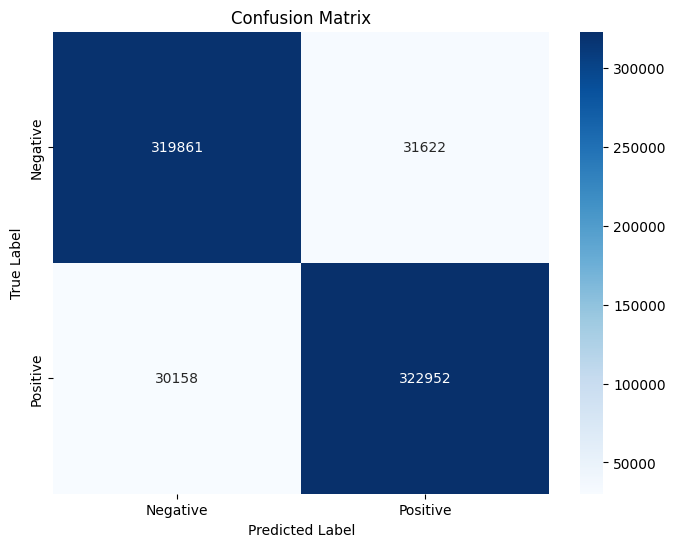

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# SAVE the architecture 
modeljson = model.to_json()
with open("model_architecture_testext_fisrtjunee.json", "w") as file:
    file.write(modeljson)

In [ ]:
# SAVE WEIGHTS
model.save_weights("model_weights_testext_firstjune.h5")

In [ ]:
# LOAD ARCHITECTURE As JSON 
with open('/kaggle/input/model-arc-to-karim/model_architecture_to_karim.json', 'r') as json_file:
    loaded_model_json = json_file.read()

In [ ]:
from tensorflow.keras.models import model_from_json

# #convert from json to a model 
loaded_model = model_from_json(loaded_model_json)

In [ ]:
# add wheights to the model archticture
loaded_model.load_weights("/kaggle/input/model-weights-to-karim/model_weights_to_karim.h5")

In [ ]:
from IPython.display import FileLink 
FileLink(r'my_model.keras')

In [ ]:
# loaded_model = tf.keras.models.load_model('/kaggle/working/modeltest.h5')

In [ ]:
model.save('model_actual_june_demo2.h5', include_optimizer=False)
# model.save('my_model.keras')


# SimpleRNN

In [17]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()


model.add(Embedding(input_dim=vocab_size,weights=[embedding_matrix] ,
                    output_dim=300,input_length=90,trainable=True))
# model.add(LSTM(units=128 ,activation='relu',return_sequences=True)) 

# model.add(LSTM(units=64 ,activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# --------------------------------

# model.add(Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.1)))
# model.add(Dense(10))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))
# -------------------------
model.add(SimpleRNN(64, return_sequences = True))
model.add(Dense(10))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=1e-2)
# model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

# Compile the model
model.compile(optimizer=Adam(lr=.001), loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 90, 300)           613135800 
                                                                 
 simple_rnn (SimpleRNN)      (None, 90, 64)            23360     
                                                                 
 dense (Dense)               (None, 90, 10)            650       
                                                                 
 dropout (Dropout)           (None, 90, 10)            0         
                                                                 
 dense_1 (Dense)             (None, 90, 1)             11        
                                                                 
Total params: 613159821 (2.28 GB)
Trainable params: 613159821 (2.28 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',    # Monitor the validation accuracy
    mode='max',                # Stop when the quantity monitored has stopped increasing
    patience=1,                # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [19]:
model.fit(X_train, Y_train, epochs=4,batch_size=64 ,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/4
  421/35230 [..............................] - ETA: 2:50:54 - loss: 0.6291 - accuracy: 0.6389

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
loaded_model = tf.keras.models.load_model('/kaggle/working/my_lstm_model.h5')

In [ ]:
# this step to save the model to use it in utils module
model.save('model0.h5')

In [ ]:
model.summary()

 ## Model 1
 
 
 ### ----> <span style="color:red">Note</span> : here we don't have an overfit [ the accuracy is kind of medium so we need to take larger sample ]

In [ ]:
model1 = Sequential()


model1.add(Embedding(input_dim=vocab_size,weights=[embedding_matrix] ,
                    output_dim=300,input_length=90,trainable=True))
# model.add(LSTM(units=128 ,activation='relu',return_sequences=True)) 

# model.add(LSTM(units=64 ,activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# --------------------------------

model1.add(Bidirectional(LSTM(128,return_sequences = True)))
model1.add(Dense(64,activation="relu"))
model1.add(Dropout(0.05))
model1.add(Dense(1, activation='sigmoid'))
# -------------------------
# model.add(Bidirectional(LSTM(128, return_sequences = True)))
# model.add(GlobalMaxPool1D())
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.05)) # -------->> to be edited 
# model.add(Dense(1, activation="sigmoid"))

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=2, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=1e-2)
# model1.compile(optimizer=Adam(lr=.0001), loss='binary_crossentropy', metrics=['acc'])

# Compile the model
model1.compile(optimizer=Adam(lr=.0001), loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

In [ ]:
model1.fit(X_train, Y_train, epochs=3,batch_size=64 ,validation_split=0.2)

# model 2

In [ ]:
model2 = Sequential()


model2.add(Embedding(input_dim=vocab_size,weights=[embedding_matrix] ,
                    output_dim=300,input_length=80,trainable=True))
# model.add(LSTM(units=128 ,activation='relu',return_sequences=True)) 

# model.add(LSTM(units=64 ,activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# --------------------------------

model2.add(Bidirectional(LSTM(128, dropout=0.25,return_sequences = True)))
model2.add(Dense(64,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
# -------------------------
# model.add(Bidirectional(LSTM(128, return_sequences = True)))
# model.add(GlobalMaxPool1D())
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.05)) # -------->> to be edited 
# model.add(Dense(1, activation="sigmoid"))

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=2, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=1e-2)
# model1.compile(optimizer=Adam(lr=.0001), loss='binary_crossentropy', metrics=['acc'])

# Compile the model
model2.compile(optimizer=Adam(lr=.0001), loss='binary_crossentropy', metrics=['accuracy'])

model2.summary()

In [ ]:
model2.fit(X_train, Y_train, epochs=7,batch_size=16 ,validation_split=0.2)

## model 2_1 
### note : the same as model 2 but we add <span style="color: red">Regulaizer</span>

In [ ]:
model2_1 = Sequential()


model2_1.add(Embedding(input_dim=vocab_size,weights=[embedding_matrix] ,
                    output_dim=300,input_length=80,trainable=True))
# model.add(LSTM(units=128 ,activation='relu',return_sequences=True)) 

# model.add(LSTM(units=64 ,activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# --------------------------------

model2_1.add(Bidirectional(LSTM(64, dropout=0.25,return_sequences = True)))
model2_1.add(Dense(32,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model2_1.add(Dropout(0.05))
model2_1.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
# -------------------------
# model.add(Bidirectional(LSTM(128, return_sequences = True)))
# model.add(GlobalMaxPool1D())
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.05)) # -------->> to be edited 
# model.add(Dense(1, activation="sigmoid"))

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=2, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=1e-2)
# model1.compile(optimizer=Adam(lr=.0001), loss='binary_crossentropy', metrics=['acc'])

# Compile the model
model2_1.compile(optimizer=Adam(lr=.001), loss='binary_crossentropy', metrics=['accuracy'])

model2_1.summary()

In [ ]:
model2_1.fit(X_train, Y_train, epochs=6,batch_size=32 ,validation_split=0.2, shuffle=True)

In [ ]:
import matplotlib.pyplot  as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()


In [ ]:
model1 = Sequential()


model1.add(Embedding(input_dim=vocab_size,weights=[embedding_matrix] ,
                    output_dim=300,input_length=70,trainable=True))
# model.add(LSTM(units=128 ,activation='relu',return_sequences=True)) 

# model.add(LSTM(units=64 ,activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# --------------------------------

# model1.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.1)))
# model1.add(Dense(32))
# model1.add(Dropout(0.3))
# model1.add(Dense(1, activation='sigmoid'))
# -------------------------
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.05)) # -------->> to be edited 
model.add(Dense(1, activation="sigmoid"))

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-2)
model1.compile(optimizer=Adam(lr=.0001), loss='binary_crossentropy', metrics=['acc'])

# Compile the model
# model.compile(optimizer=Adam(lr=.0001), loss='binary_crossentropy', metrics=['accuracy'])
